In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv


In [2]:
data = pd.read_csv("/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv")

In [3]:
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [5]:
data.drop(['RemovedTeeth','HadSkinCancer','DeafOrHardOfHearing','BlindOrVisionDifficulty','DifficultyErrands','RaceEthnicityCategory'],axis = 1 , inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   HadHeartAttack             246022 non-null  object 
 9   HadAngina                  246022 non-null  object 
 10  HadStroke                  246022 non-null  object 
 11  HadAsthma                  246022 non-null  object 
 12  HadCOPD                    246022 non-null  object 
 13  HadDepressiveDisorder      24

In [7]:
data.drop(['LastCheckupTime'],axis=1,inplace=True)

In [8]:
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Yes,9.0,No,No,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Yes,6.0,No,No,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,No,8.0,No,No,No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Yes,9.0,No,No,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Yes,5.0,No,No,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [9]:
data.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
PhysicalActivities           0
SleepHours                   0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusLast10Tdap            0
HighRiskLastYear             0
CovidPos

In [10]:
data.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
PhysicalActivities           0
SleepHours                   0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusLast10Tdap            0
HighRiskLastYear             0
CovidPos

In [11]:
data_categorical = data.select_dtypes(include = 'object')
for col in data_categorical:
    print(f"\nUnique Values for '{col}' : ")
    print(data[col].unique())


Unique Values for 'State' : 
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']

Unique Values for 'Sex' : 
['Female' 'Male']

Unique Values for 'GeneralHealth' : 
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']

Unique Values for 'PhysicalActivities' : 
['Yes' 'No']

Unique Values for 'HadHeartAttack' : 
['No' 'Yes']

Unique Values for 'HadAngina' : 
['No' 'Yes']

Unique Values for 'HadStroke' : 
['No' 

In [12]:
numerical_cols = data.select_dtypes(np.number).columns
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q1-Q3
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = data[col].median()
    data[col] = np.where((data[col]<lower)|(data[col]>upper),median,data[col])

In [13]:
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Yes,7.0,No,No,No,...,1.7,81.65,27.46,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Yes,7.0,No,No,No,...,1.7,81.65,27.46,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,No,7.0,No,No,No,...,1.7,81.65,27.46,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,0.0,0.0,Yes,7.0,No,No,No,...,1.7,81.65,27.46,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,0.0,0.0,Yes,7.0,No,No,No,...,1.7,81.65,27.46,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [14]:
data.drop(['TetanusLast10Tdap'],axis=1,inplace = True)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

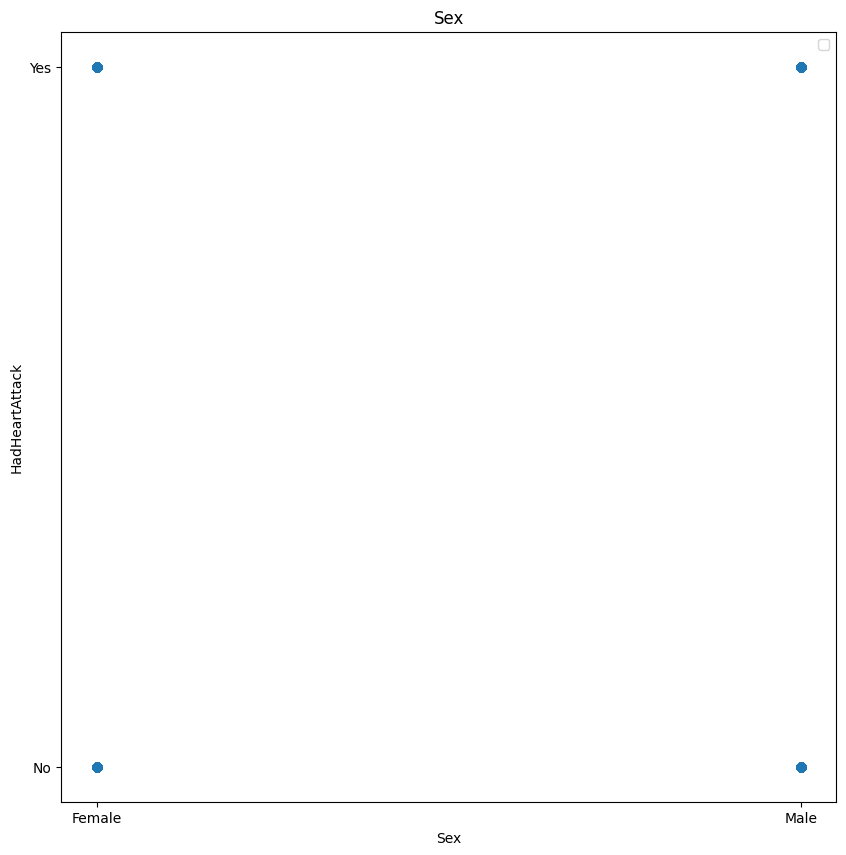

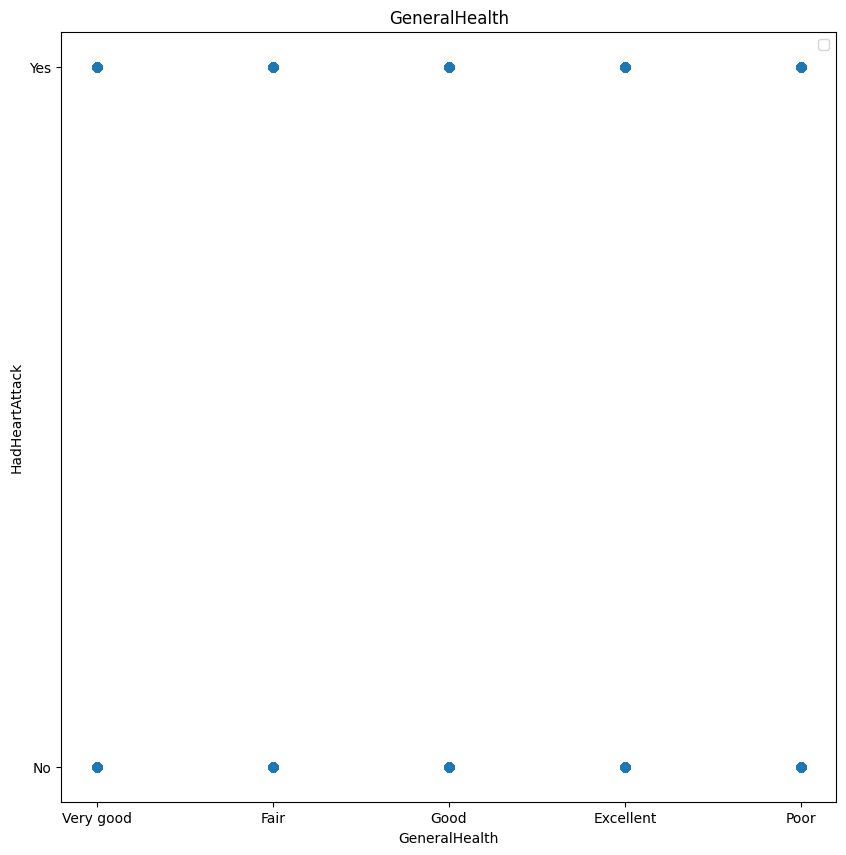

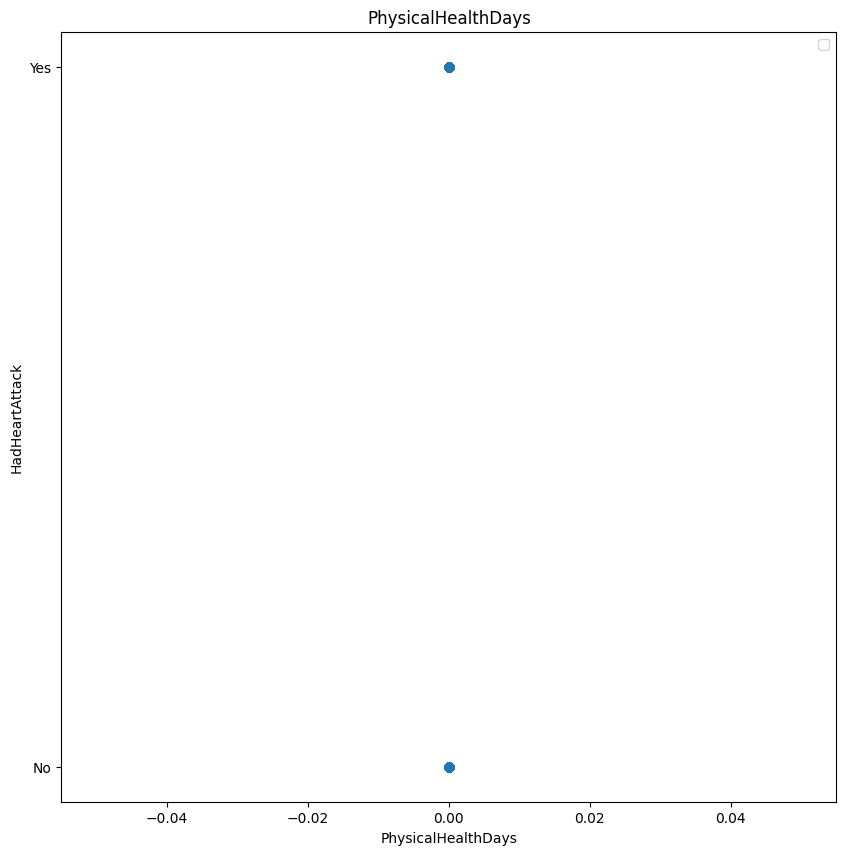

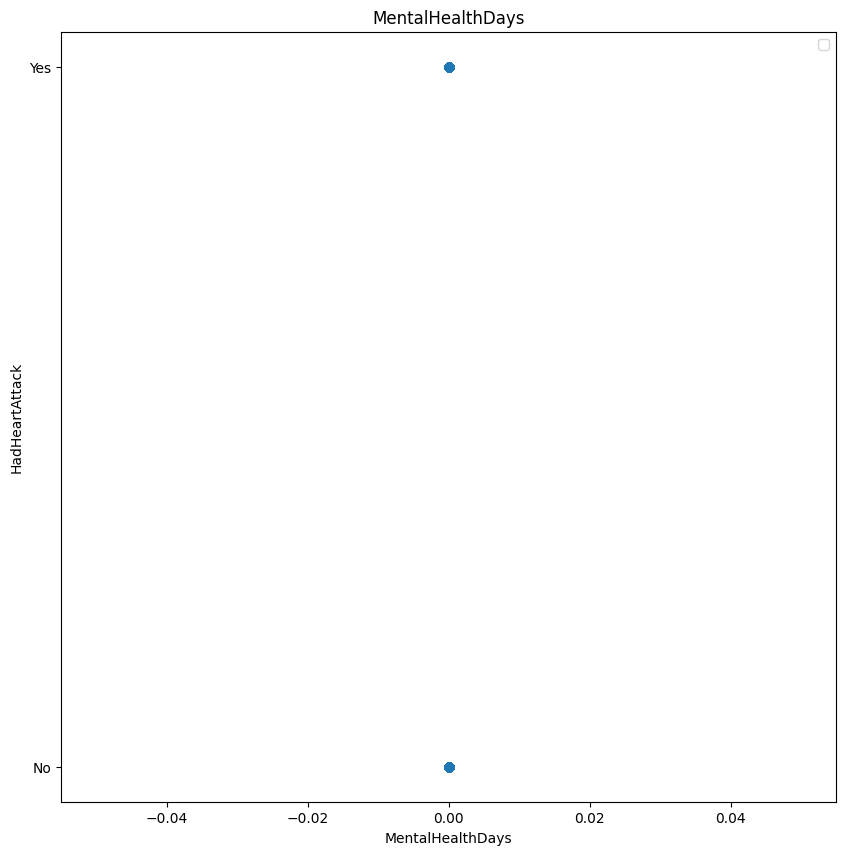

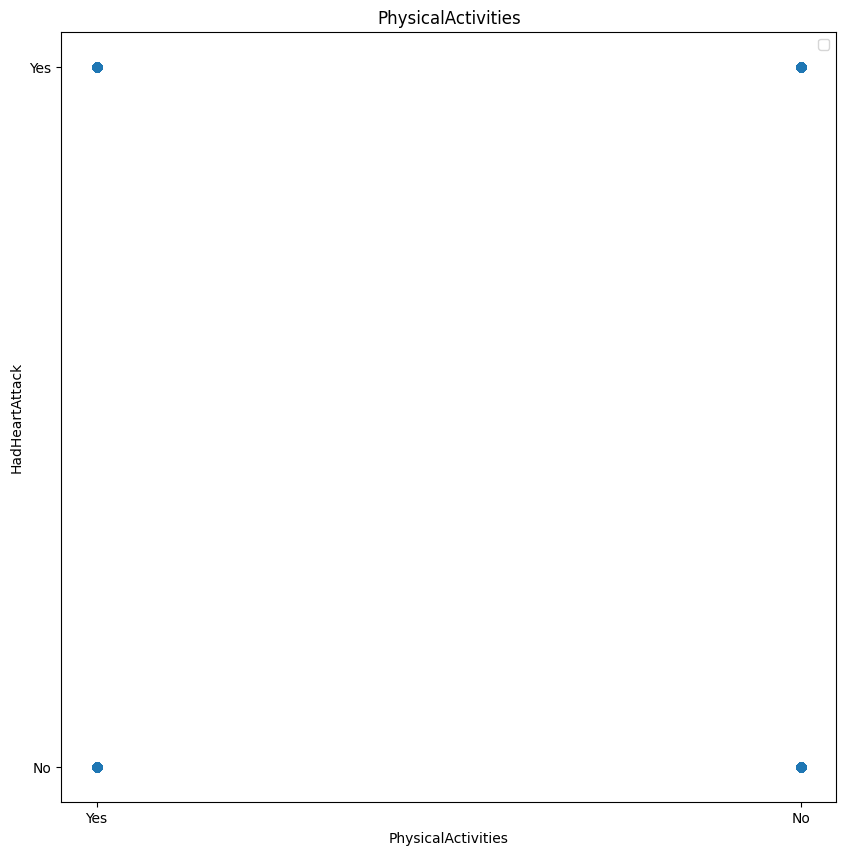

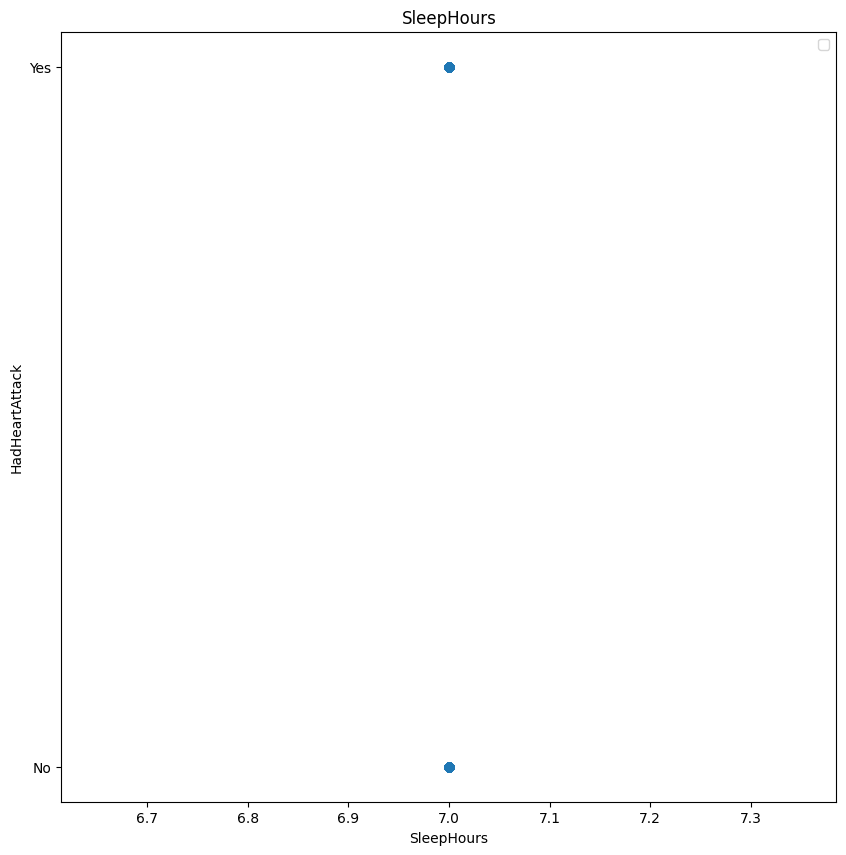

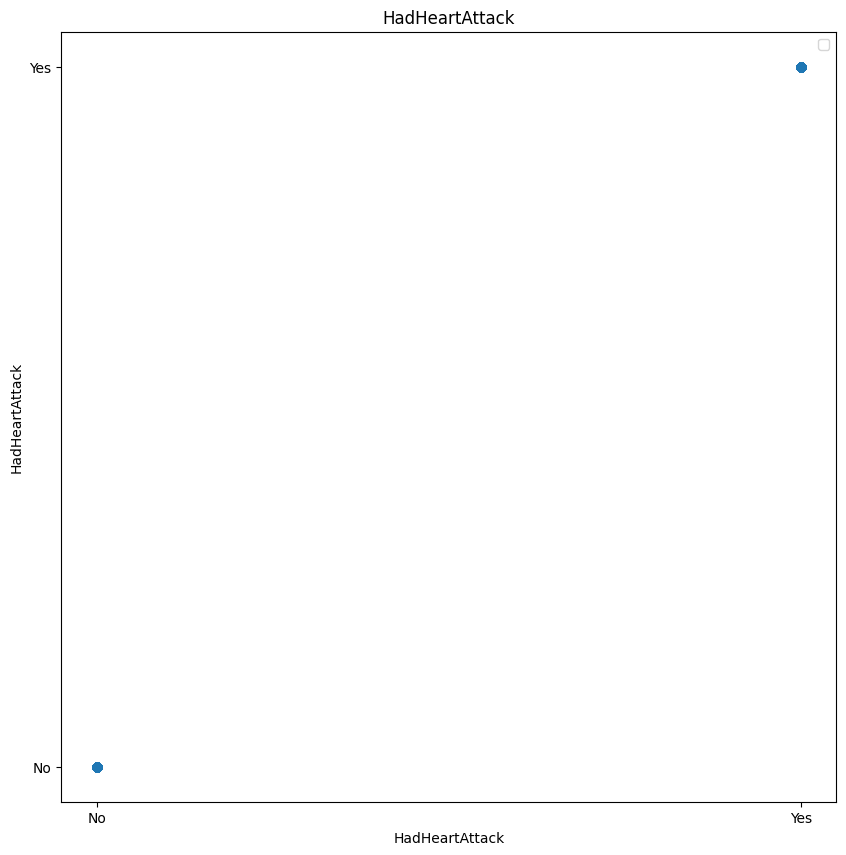

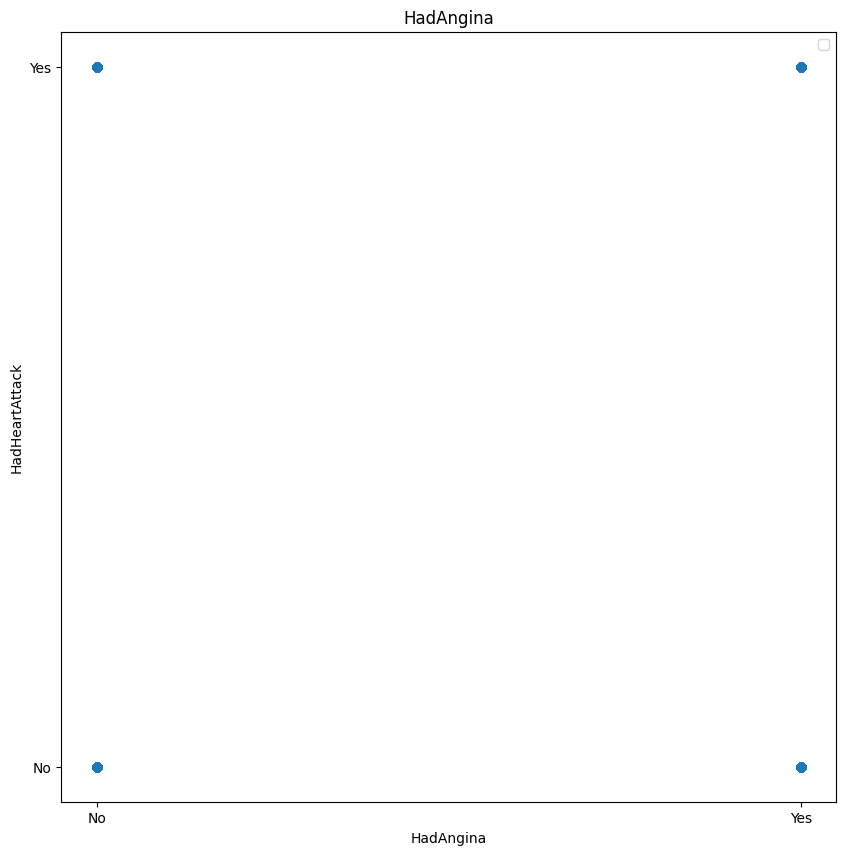

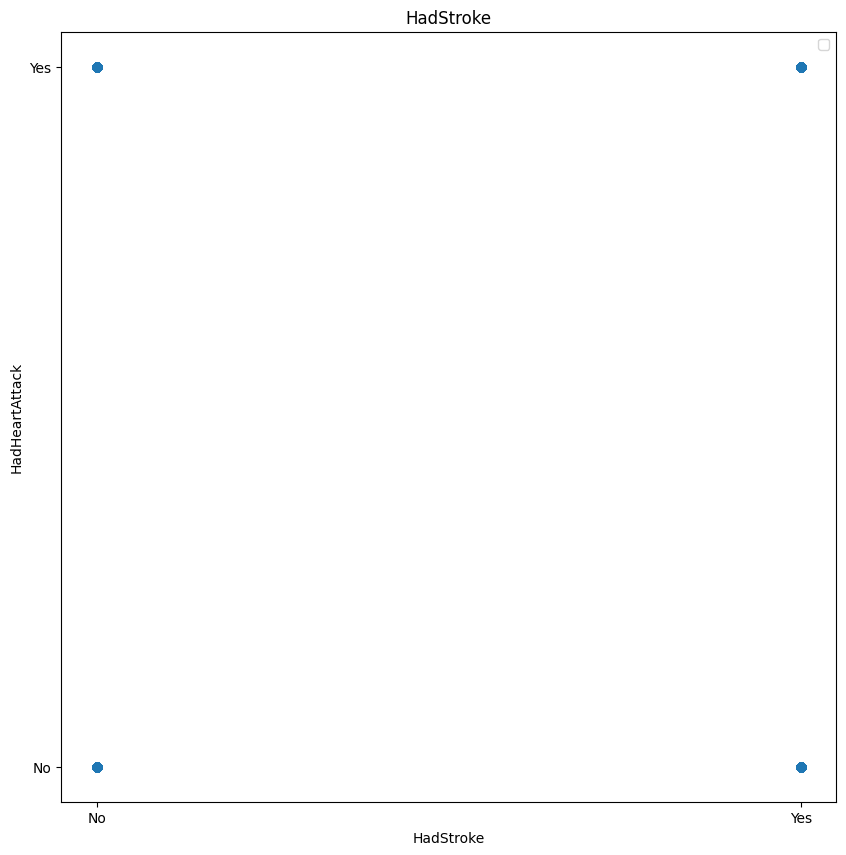

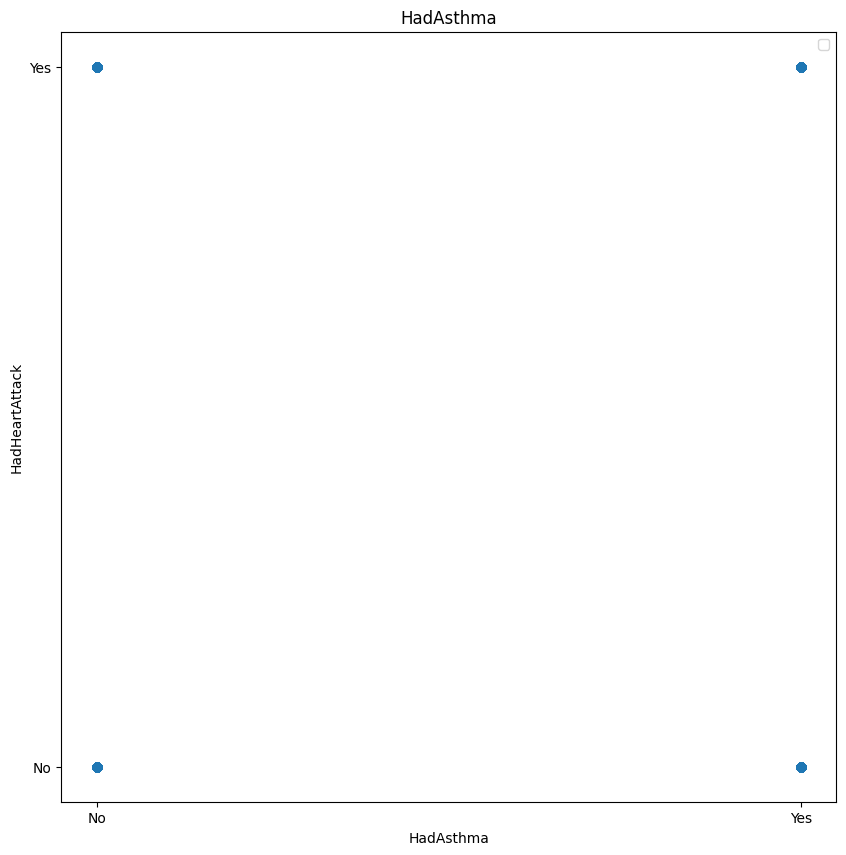

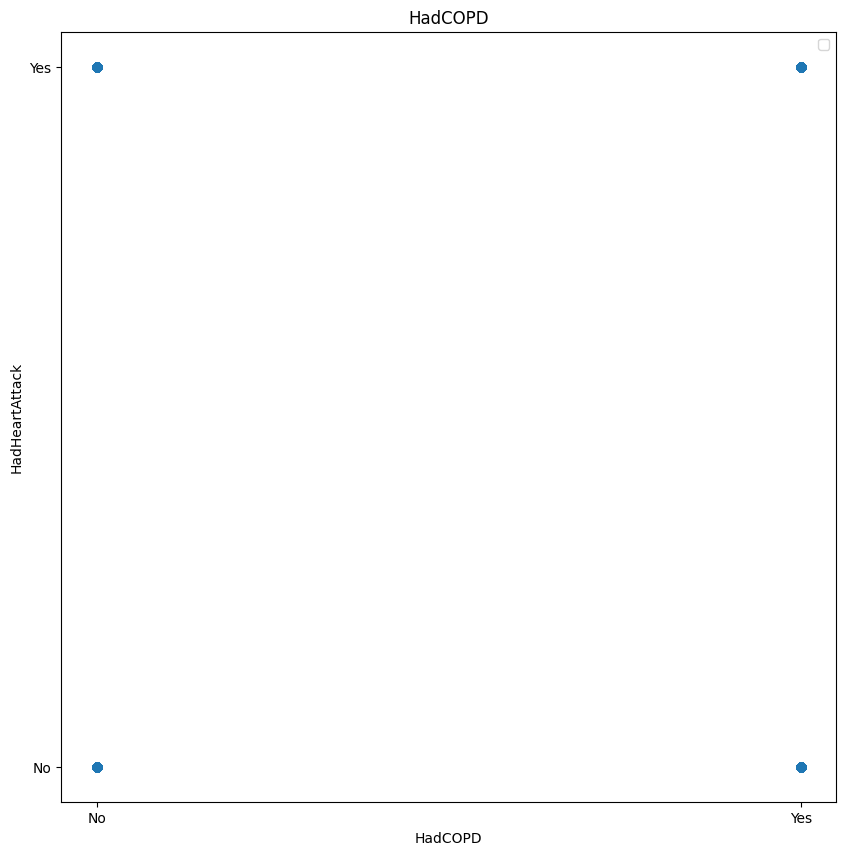

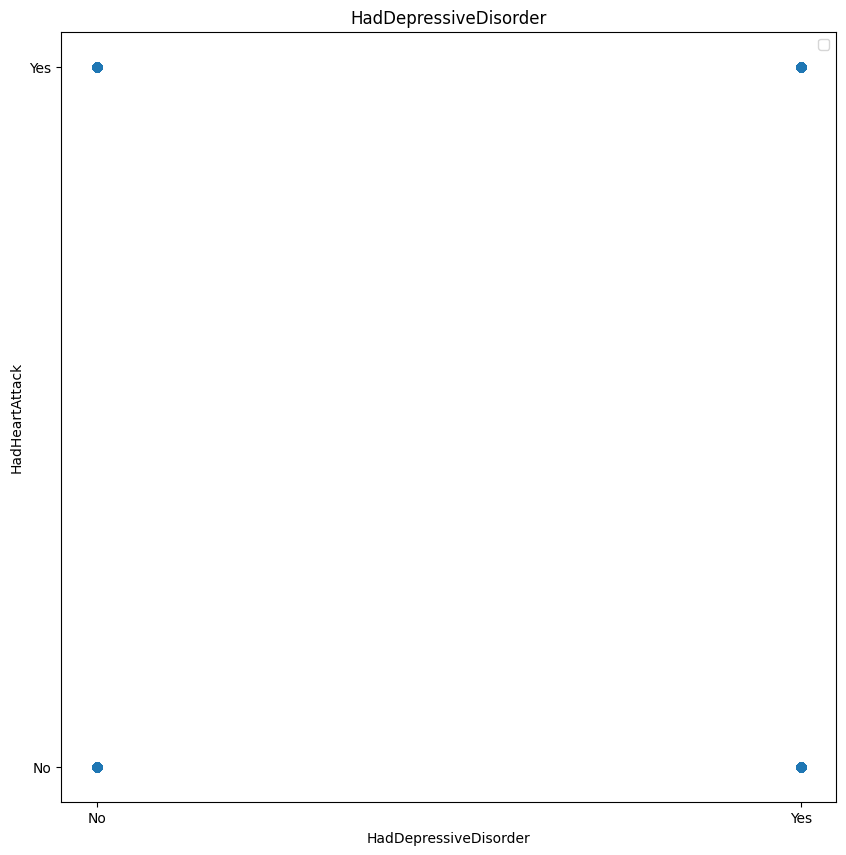

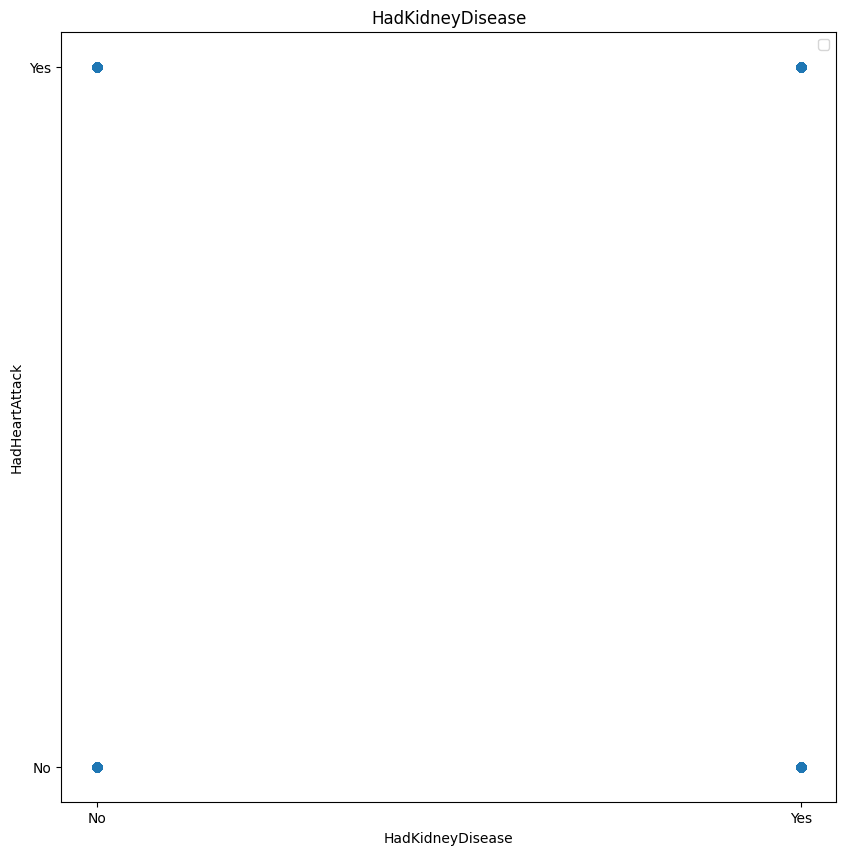

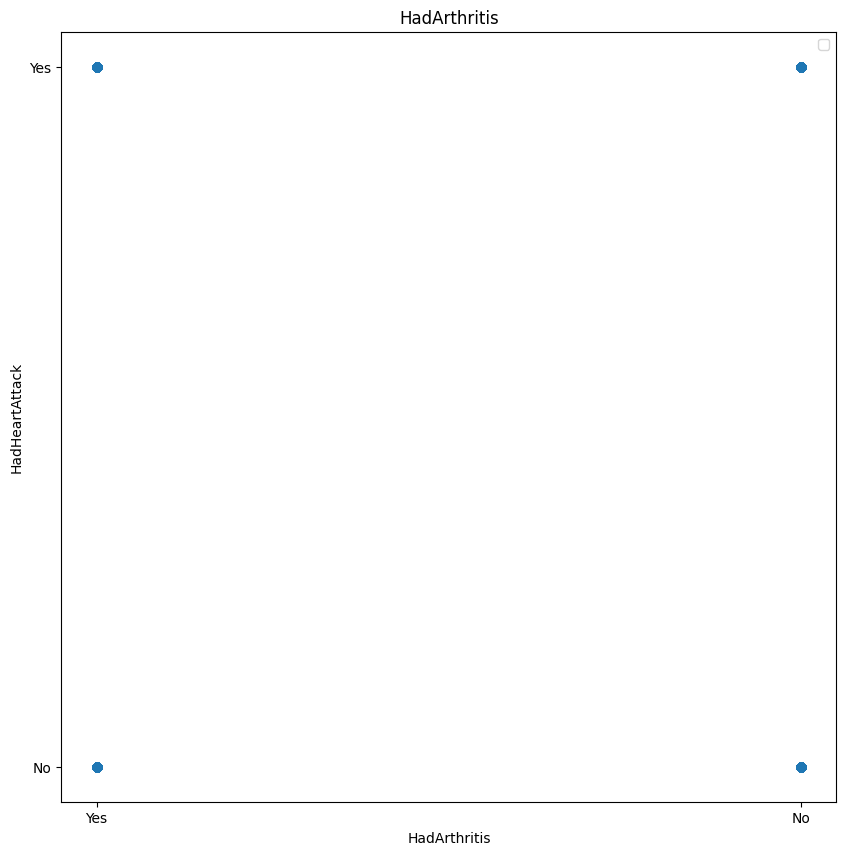

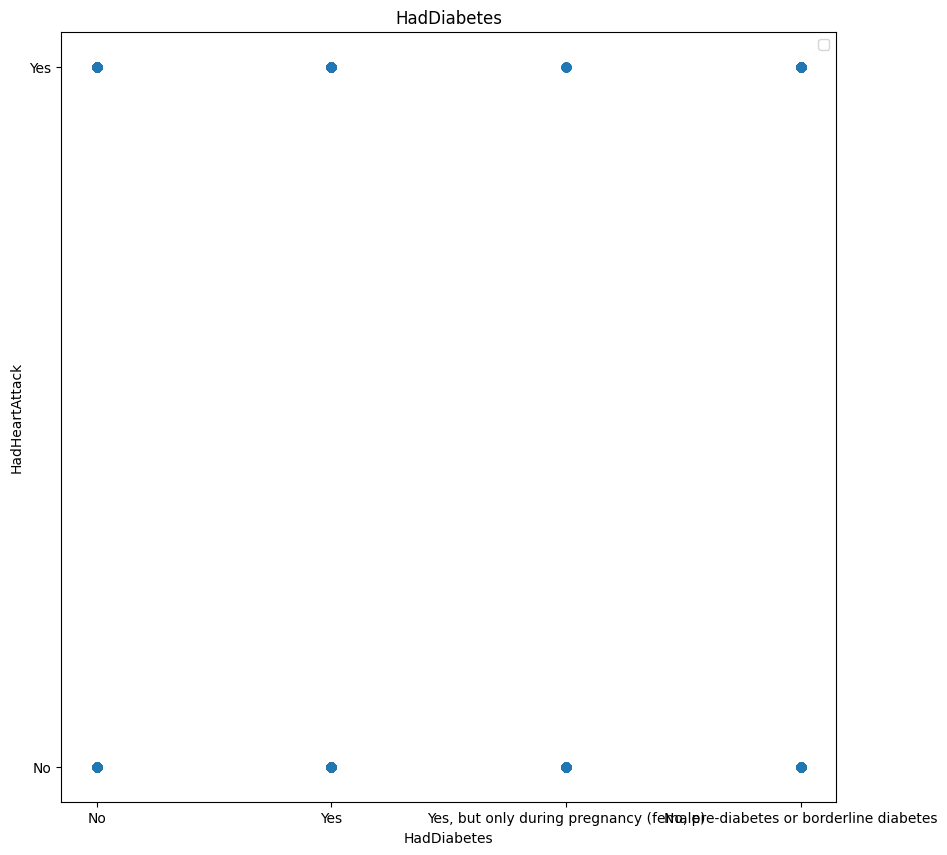

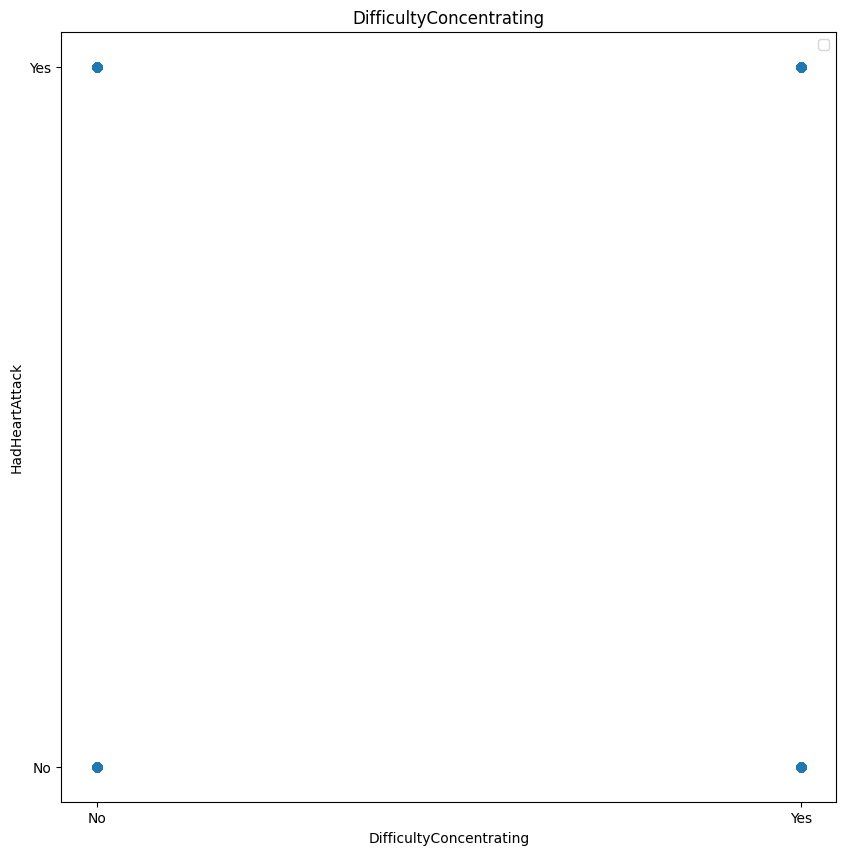

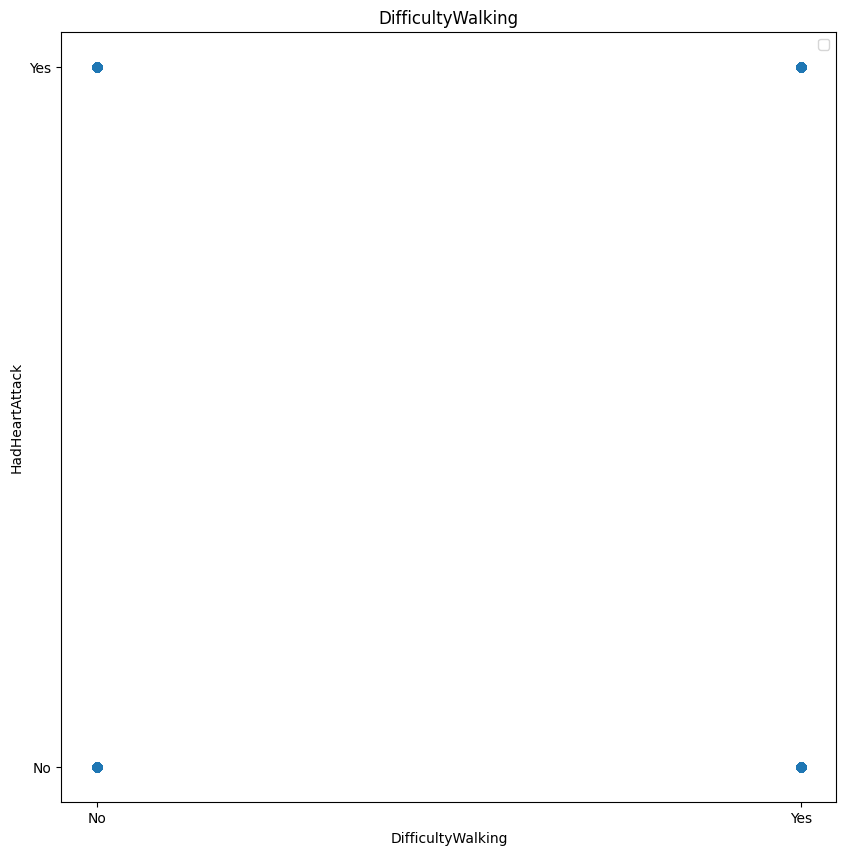

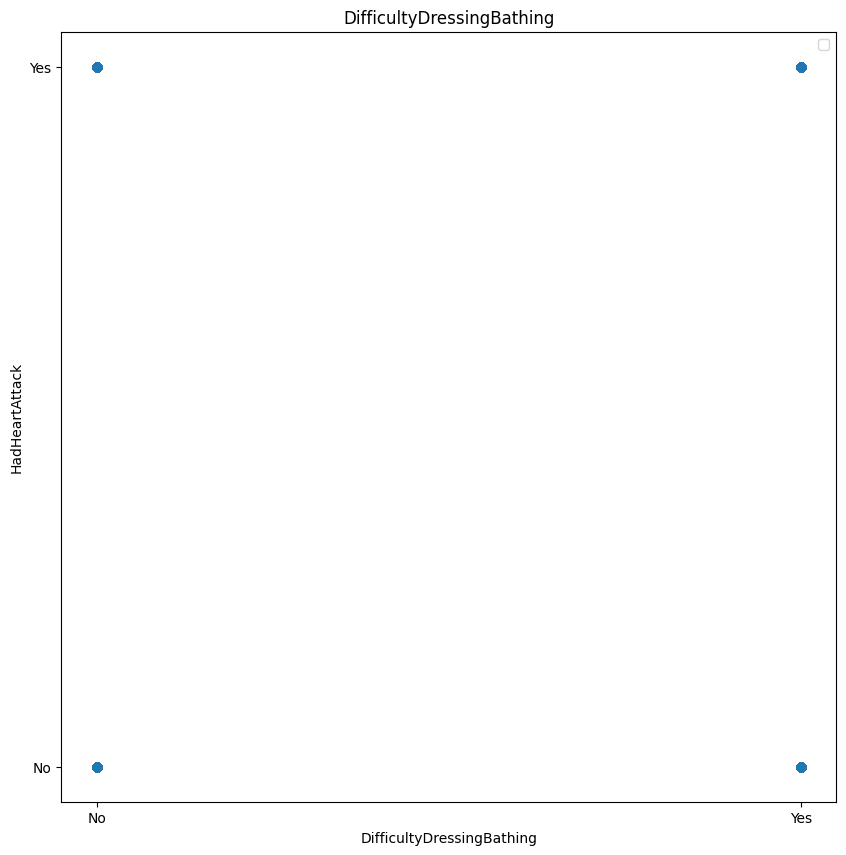

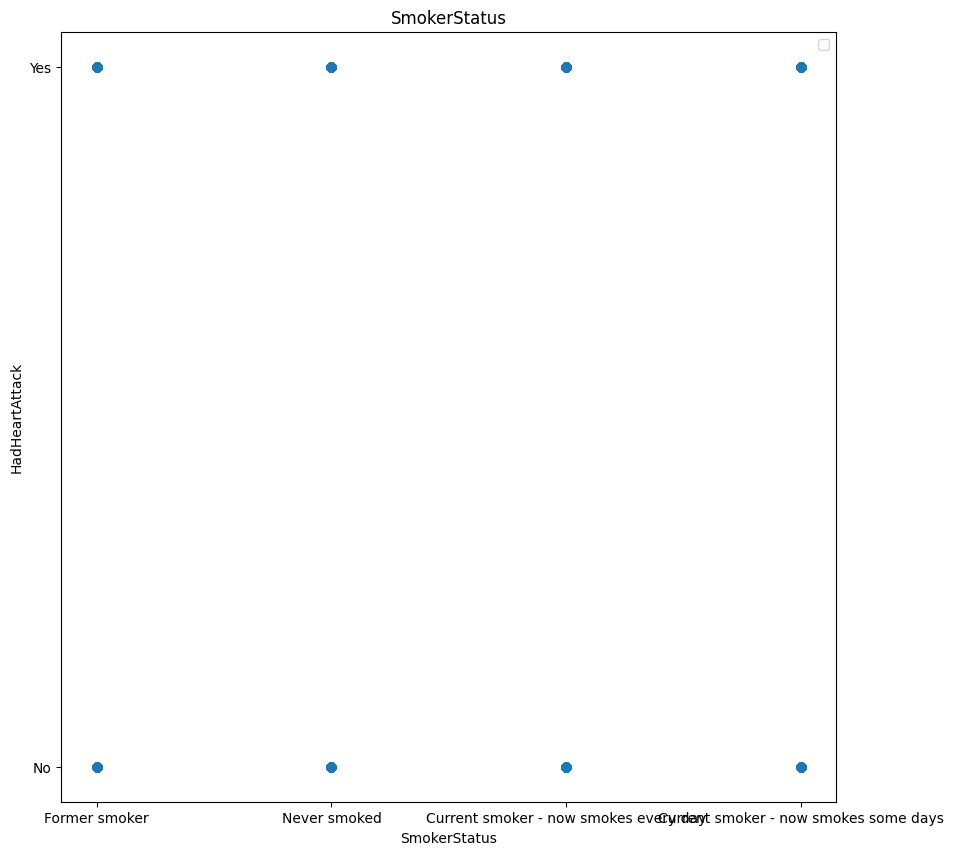

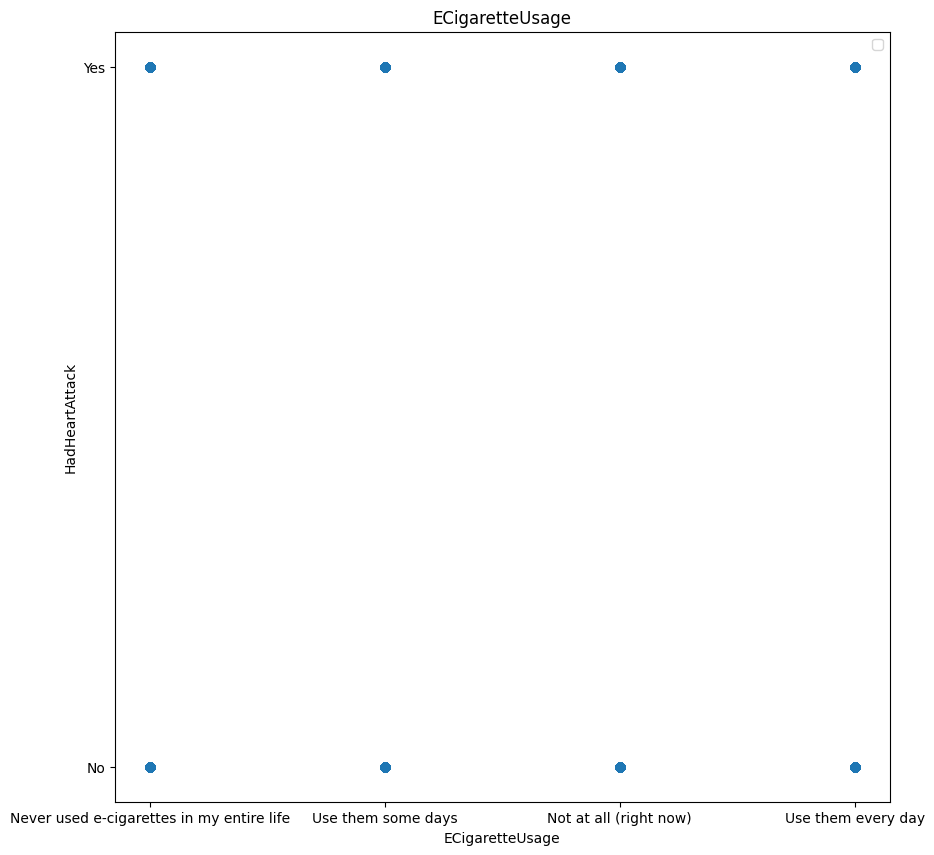

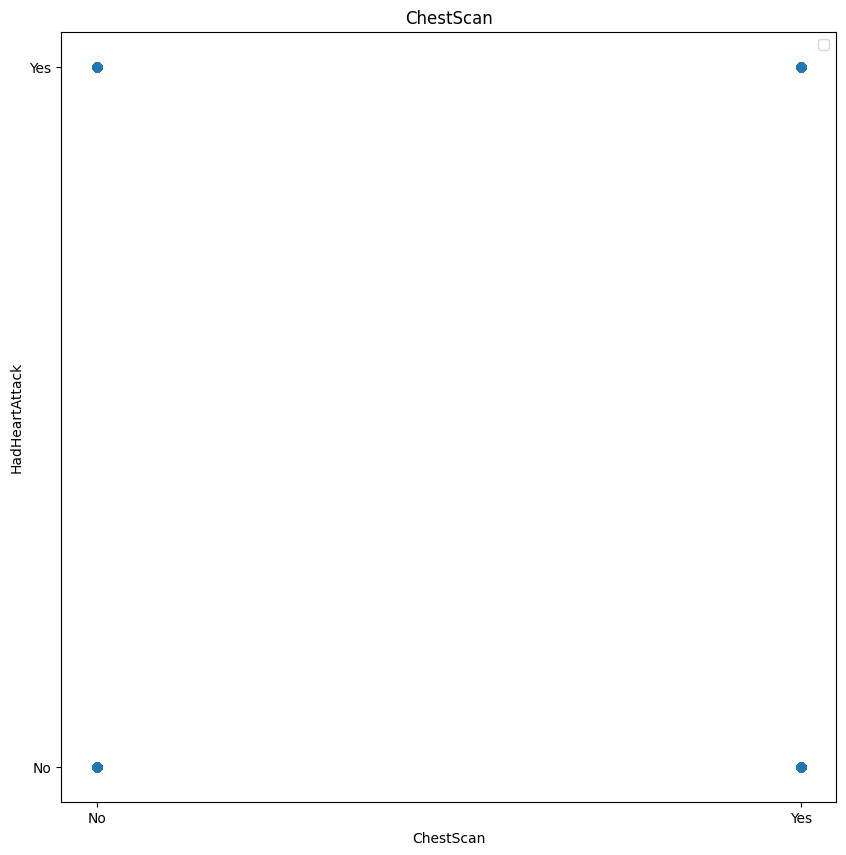

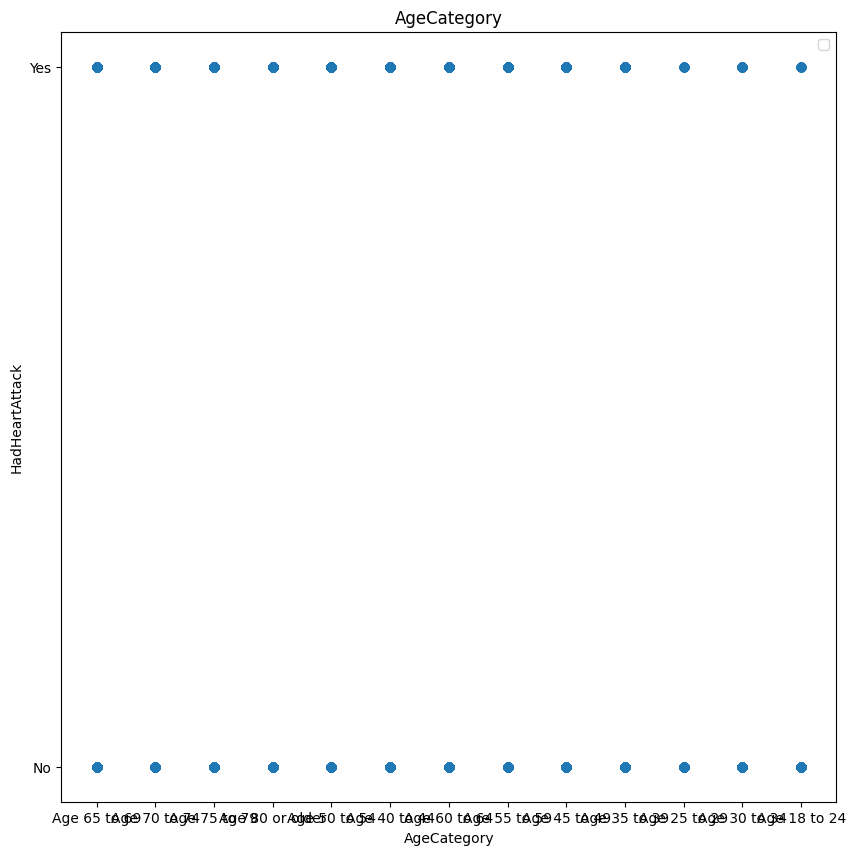

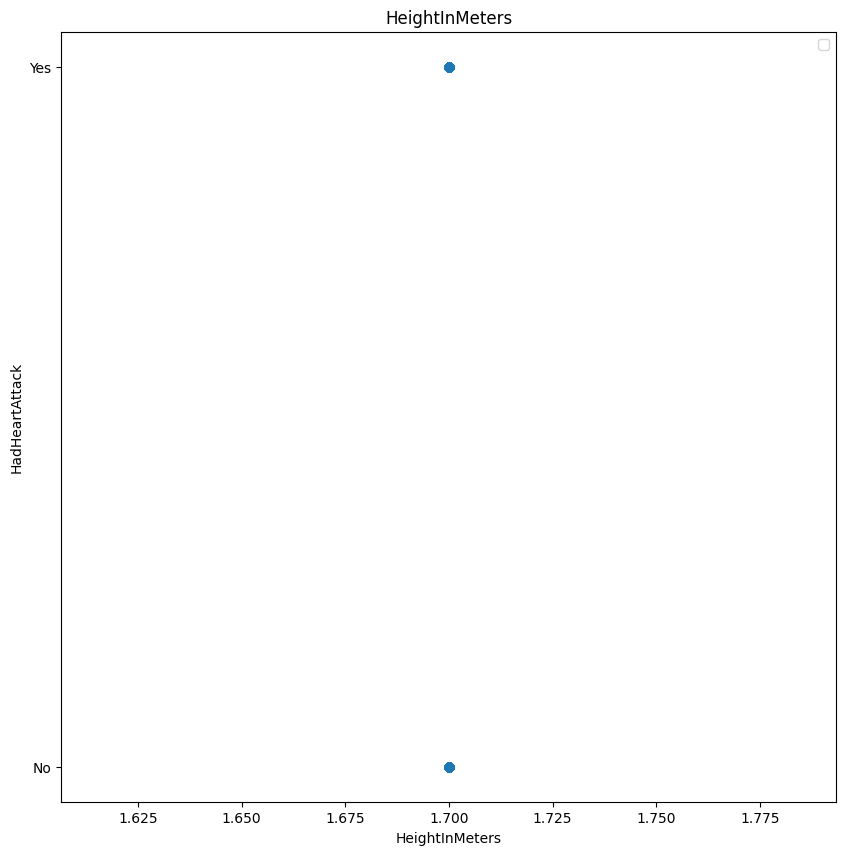

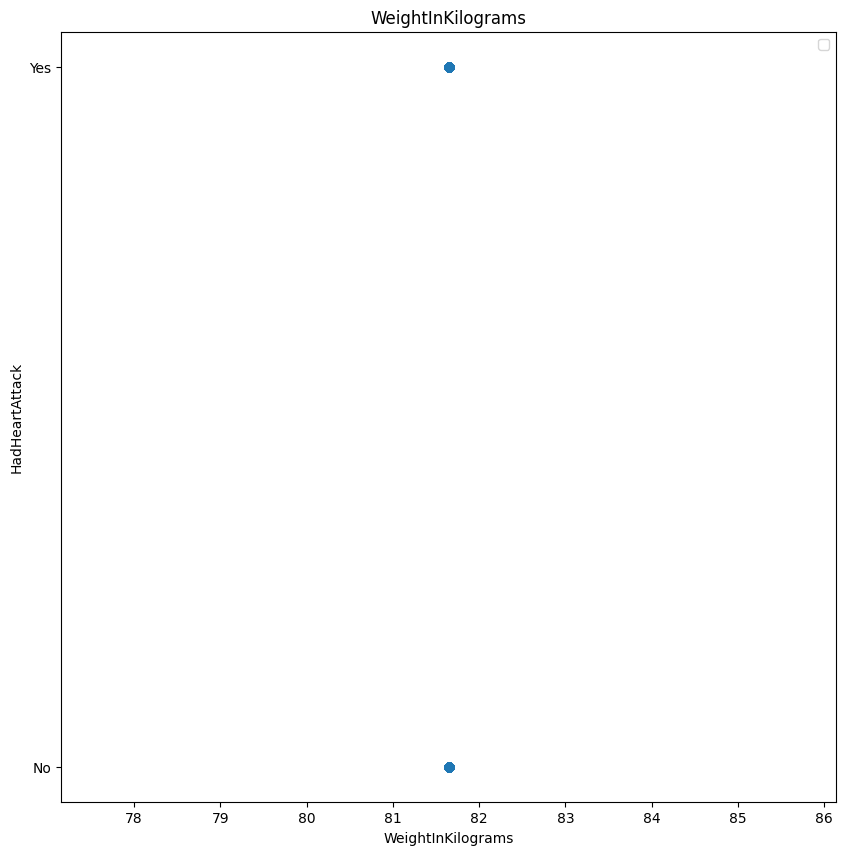

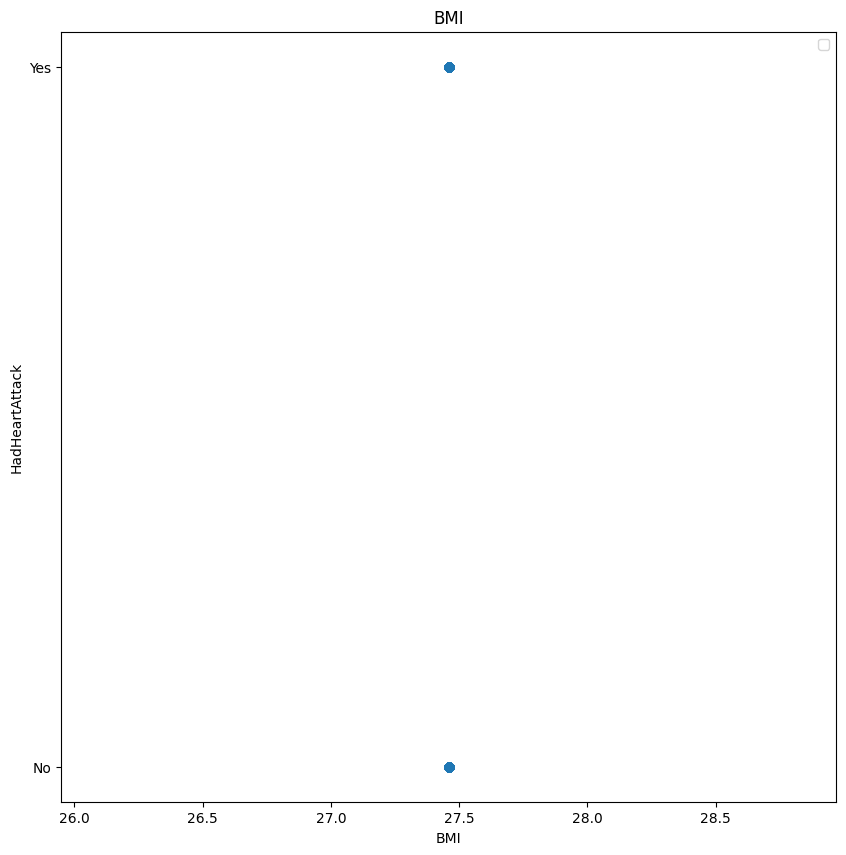

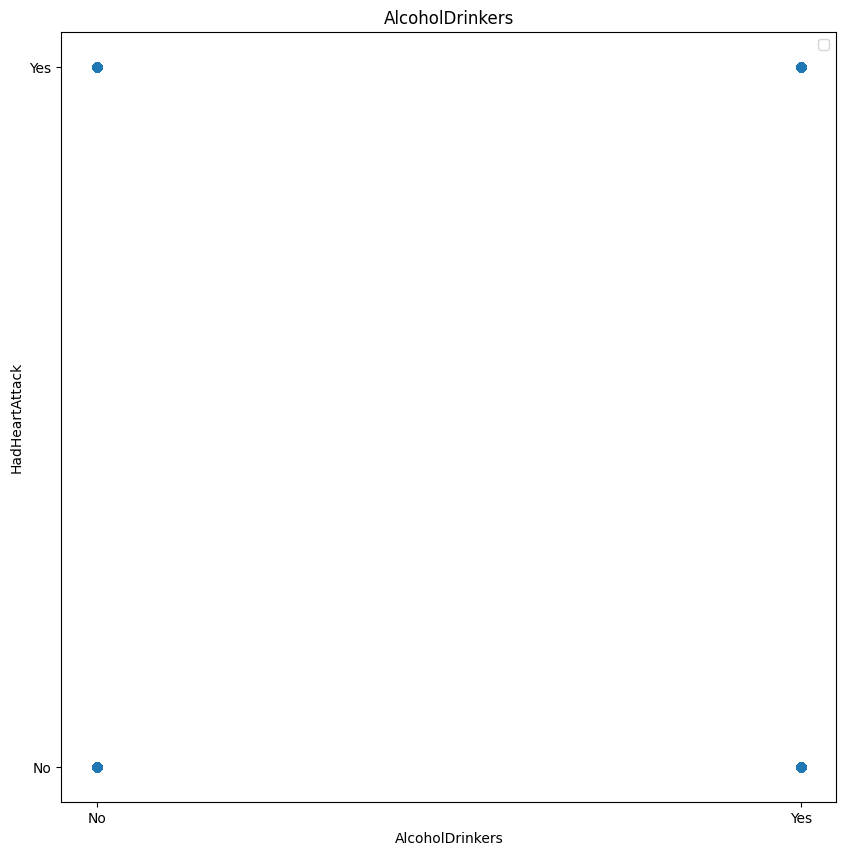

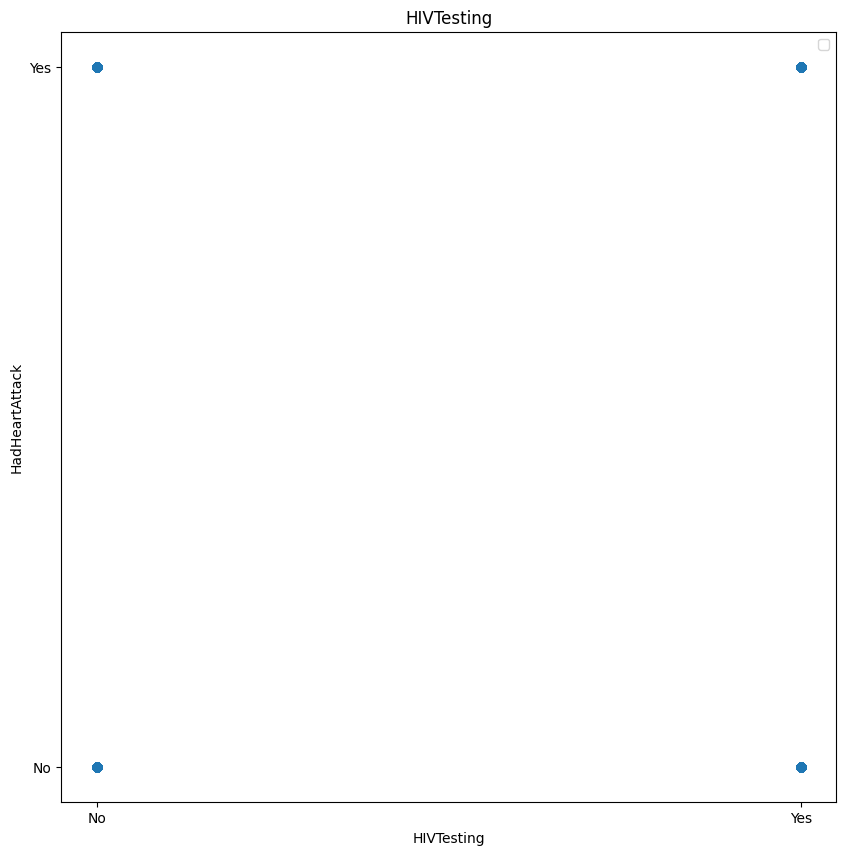

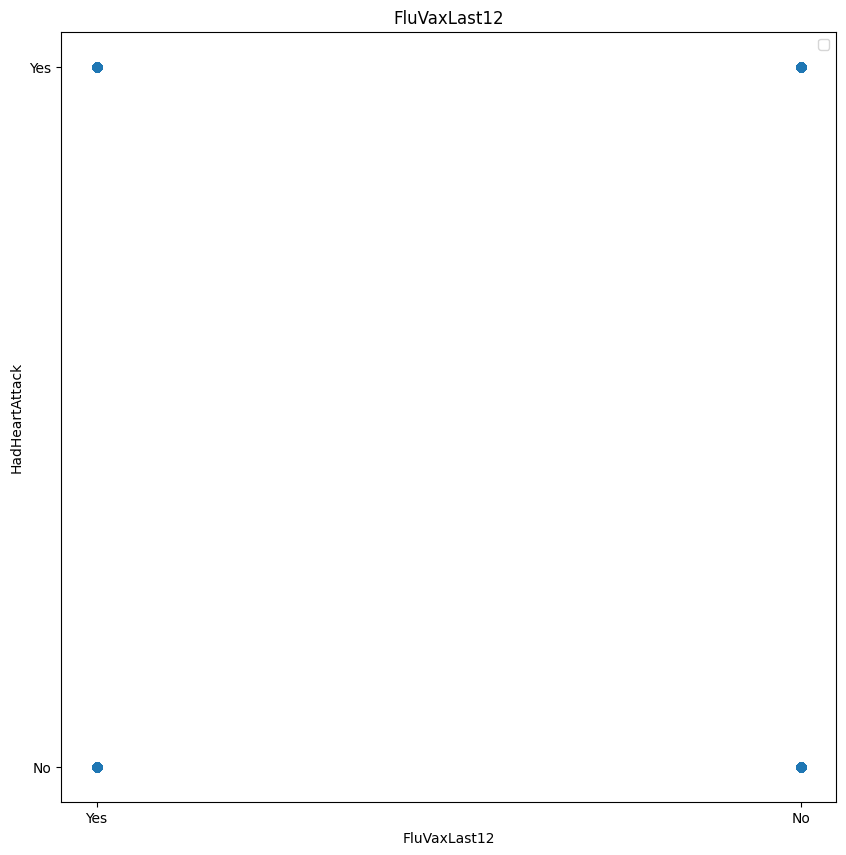

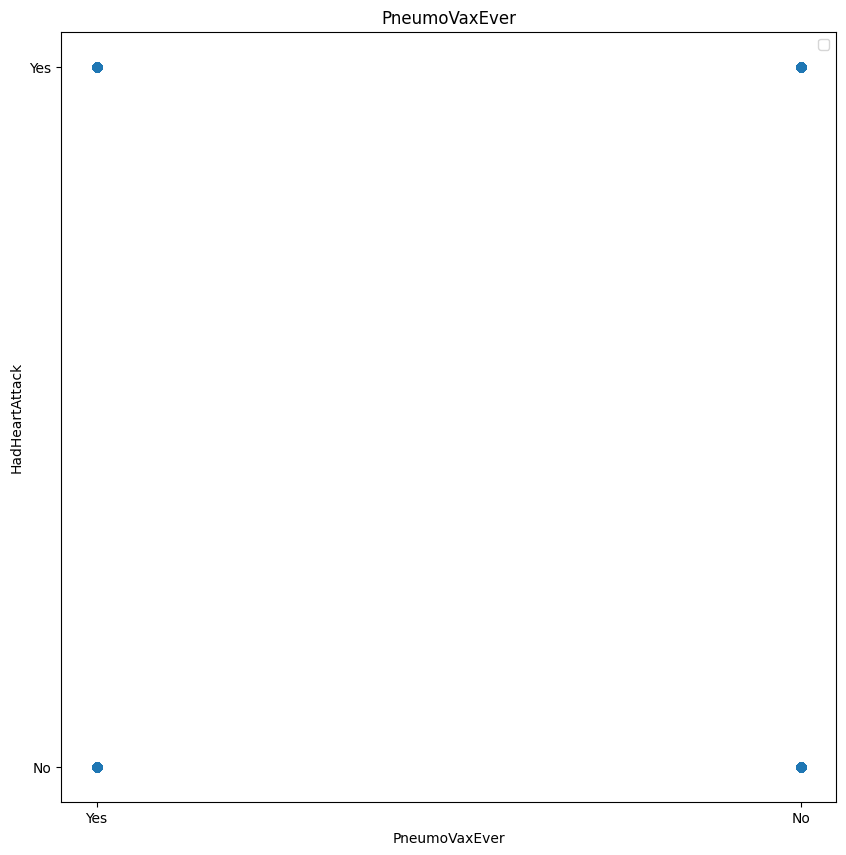

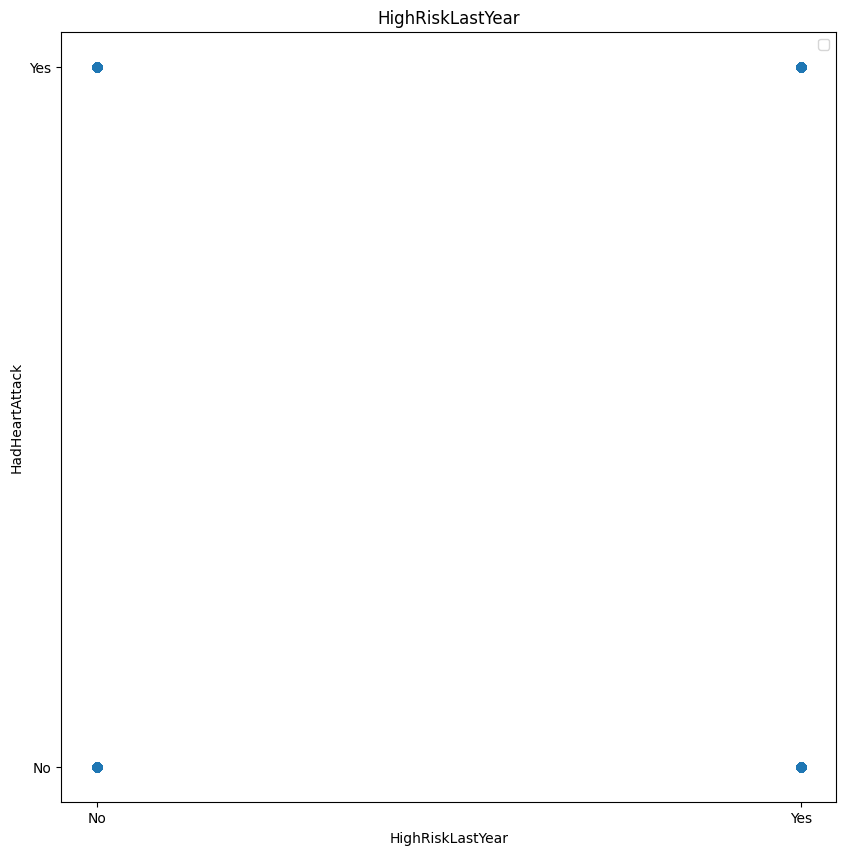

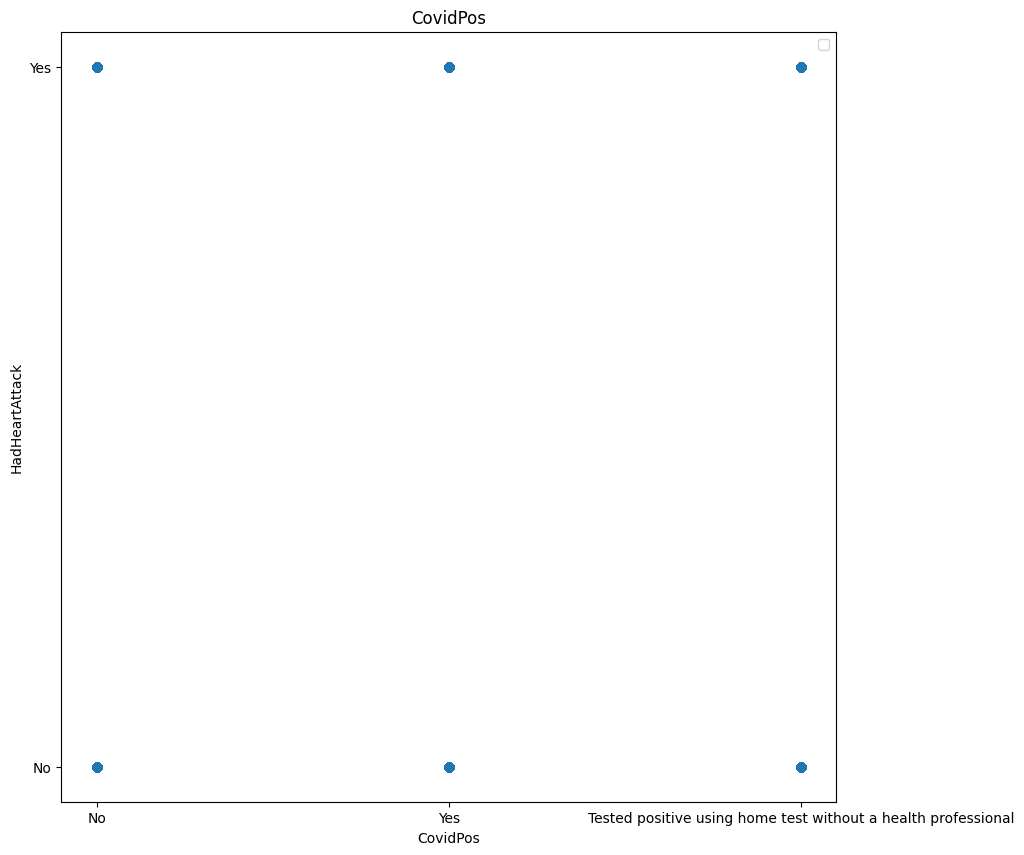

In [16]:
for i in data.columns[1:]:
    plt.figure(figsize = (10,10))
    plt.scatter(data[i],data['HadHeartAttack'])
    plt.title(i)
    plt.ylabel("HadHeartAttack")
    plt.xlabel(i)
    plt.legend()
    plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [18]:
le = LabelEncoder()
data['HadHeartAttack'] = le.fit_transform(data['HadHeartAttack'])
display(data.head())

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Yes,7.0,0,No,No,...,Age 65 to 69,1.7,81.65,27.46,No,No,Yes,Yes,No,No
1,Alabama,Male,Very good,0.0,0.0,Yes,7.0,0,No,No,...,Age 70 to 74,1.7,81.65,27.46,No,No,Yes,Yes,No,No
2,Alabama,Male,Very good,0.0,0.0,No,7.0,0,No,No,...,Age 75 to 79,1.7,81.65,27.46,Yes,No,No,Yes,No,Yes
3,Alabama,Female,Fair,0.0,0.0,Yes,7.0,0,No,No,...,Age 80 or older,1.7,81.65,27.46,No,No,Yes,Yes,No,Yes
4,Alabama,Female,Good,0.0,0.0,Yes,7.0,0,No,No,...,Age 80 or older,1.7,81.65,27.46,No,No,Yes,Yes,No,No


In [19]:
x = data.drop('HadHeartAttack', axis=1)
y = data.HadHeartAttack

In [20]:
x_encoded = pd.get_dummies(x)

In [21]:
model = linear_model.LinearRegression()

In [22]:
model.fit(x_encoded,y)

LinearRegression()

In [23]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
y_predicted = model.predict(x_encoded)

In [24]:
mean_absolute_error(y_predicted,y)

0.08366037577432099

In [25]:
mean_squared_error(y_predicted,y)

0.03961883302291611

In [26]:
model.coef_

array([ 6.72347723e+05, -2.34294570e+11, -3.01738147e+11, -1.85964021e+11,
        1.28223667e+11,  2.83100643e+11,  1.08438119e+11,  1.08438119e+11,
        1.08438119e+11,  1.08438119e+11,  1.08438119e+11,  1.08438119e+11,
        1.08438119e+11,  1.08438119e+11,  1.08438119e+11,  1.08438119e+11,
        1.08438119e+11,  1.08438119e+11,  1.08438119e+11,  1.08438119e+11,
        1.08438119e+11,  1.08438119e+11,  1.08438119e+11,  1.08438119e+11,
        1.08438119e+11,  1.08438119e+11,  1.08438119e+11,  1.08438119e+11,
        1.08438119e+11,  1.08438119e+11,  1.08438119e+11,  1.08438119e+11,
        1.08438119e+11,  1.08438119e+11,  1.08438119e+11,  1.08438119e+11,
        1.08438119e+11,  1.08438119e+11,  1.08438119e+11,  1.08438119e+11,
        1.08438119e+11,  1.08438119e+11,  1.08438119e+11,  1.08438119e+11,
        1.08438119e+11,  1.08438119e+11,  1.08438119e+11,  1.08438119e+11,
        1.08438119e+11,  1.08438119e+11,  1.08438119e+11,  1.08438119e+11,
        1.08438119e+11,  

In [27]:
model.intercept_

-19373511319394.6

In [28]:
import joblib
joblib.dump(model,"HeartDiseases")
mymodel = joblib.load("HeartDiseases")